In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os


In [44]:
dat = pd.read_csv("Train.csv")

In [45]:
data = dat.loc[:, dat.columns != 'ID']
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## Individual variables 

To start, its important to look at our indvidual variables, as it can provide us with a valuable first glance at our data and we are able to see what we are working with.
From first glances here are things I noticed: 
- A majority of the customers buying are are between their mid twenties - mid fifties
- Most customers only have between 0-1 year of experience 
- Most customers have a family size of  2 kids
- Most customers that are buying are male
- Most customers are married
- Most customers have graduated 
- Most customers are artists (this was a cool suprise to me, I wonder why a majority of them are artists) 
- Most customers have a low spending score
- When randomly categorized, most customers fell into the 6th category 
- the segmentation done previously are fairly equal 

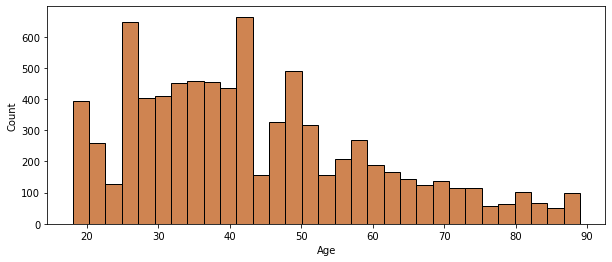

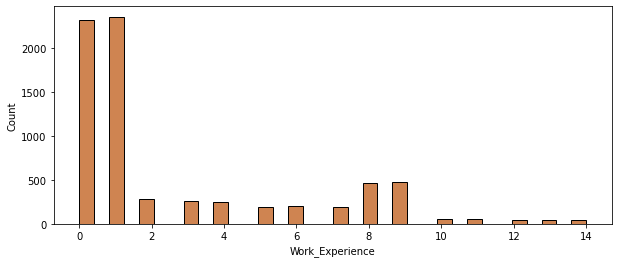

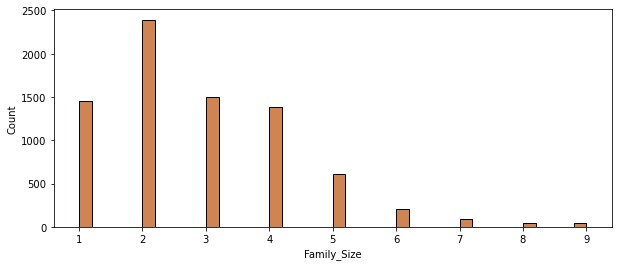

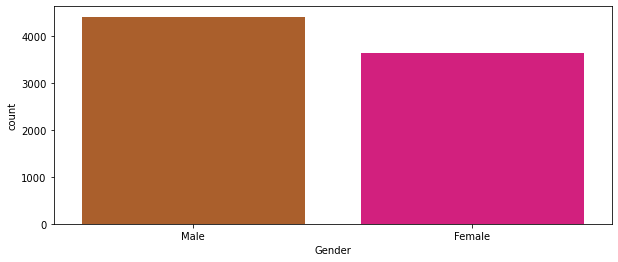

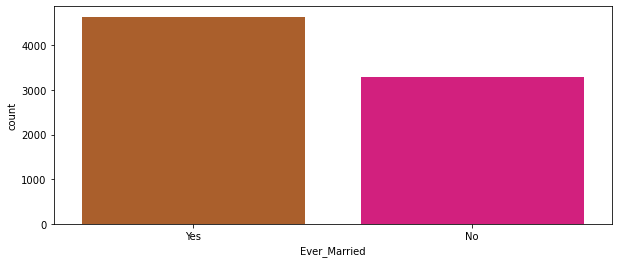

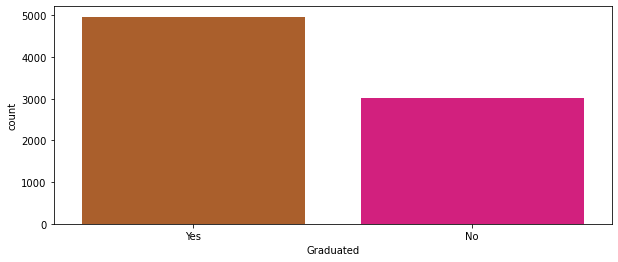

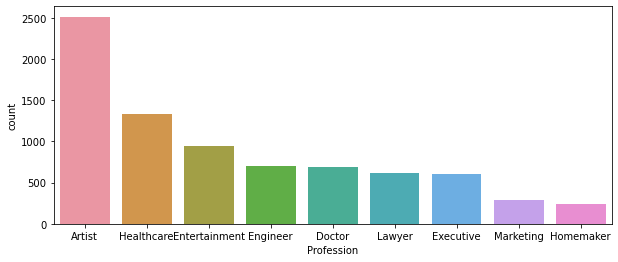

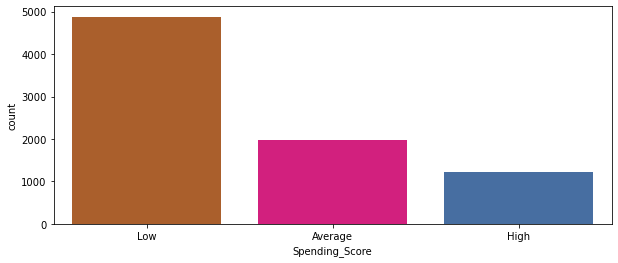

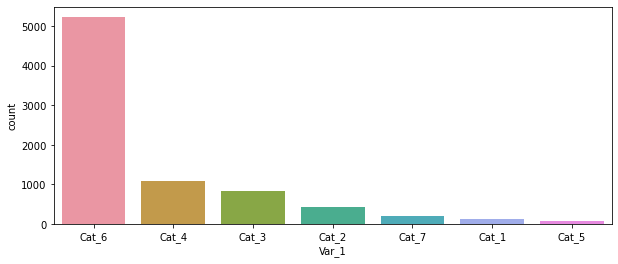

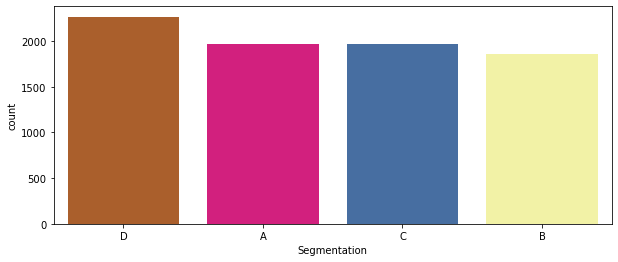

In [46]:
sns.set_palette('Accent_r', n_colors=6, desat=None, color_codes=False)

numerical = data.select_dtypes('number').columns
cat = data.select_dtypes(include=['object']).columns

for col in numerical:
    fig, ax = plt.subplots(1, figsize=(10,4))
    sns.histplot(data=data, x=col)

for col in cat:
    fig, ax = plt.subplots(1, figsize=(10,4))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index)
    

## Data pre-processing 

Now that i have had a quick visual glance at the dataset, before i analyze the various variables with respect to the segmentation provided by the manager, I want to pre-process the data and make sure its clean as well as undertsand the data numerically. 

In [47]:
# Check for Data Types
data.info()
## all good, there seems to be nothing out of place or encoded as the wrong thing

## Check for Missing Values
data.isnull().sum()
#uh-oh there are a few missing values, especially in work experience, family size and marital status 
# Lets fix that! 
# Imputing my missing values, boils down to the distribution of my missing data and since the distribution of the individual variables are skewed, the best method would be to take the mode
# Imputing is important in this project, since I will most likely be using logistic regression and SVM
# i cannot get rid of the values since there are alot of missing values and you shouldn't really tamper with the data like that 

for col in data.columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

data.isnull().sum()
    
# Check for Bad Data 
data[data == 0].count() 
## makes sense its only in work experience 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience    2318
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation          0
dtype: int64

In [48]:
# numerical data distribution 
data.skew()
# heavy skew in work experience, and that might be due to the imputation of the missing values in work experince and family size
 
## this is sufficient pre-processing for now, i will deal with normalizaing my data, data imablance, transformations, feature engineering, and feature selection after understanding my variables wrt to the segmentation 

Age                0.696021
Work_Experience    1.473129
Family_Size        1.075737
dtype: float64

## Variable analysis WRT to segments 

I want to see how the numerical and categorical variables interact with each other as well as see if theres any trends in regards to the segments 

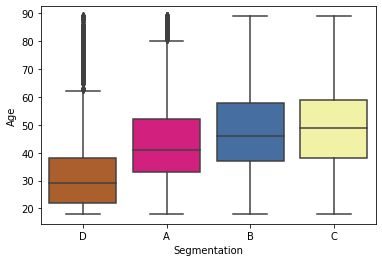

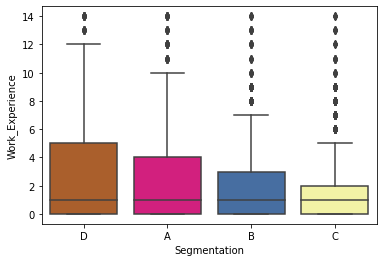

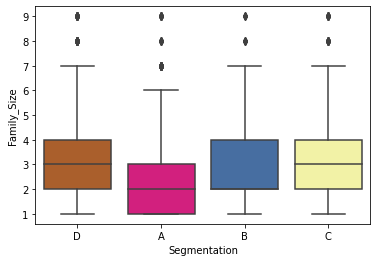

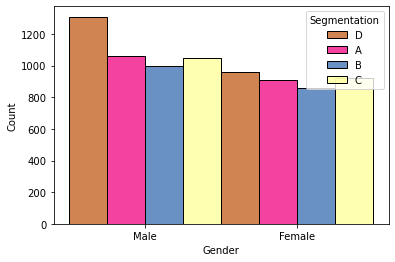

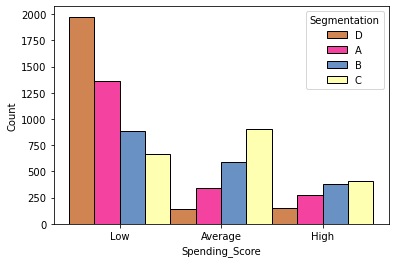

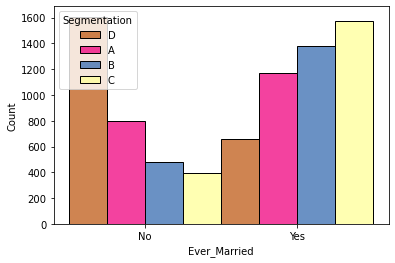

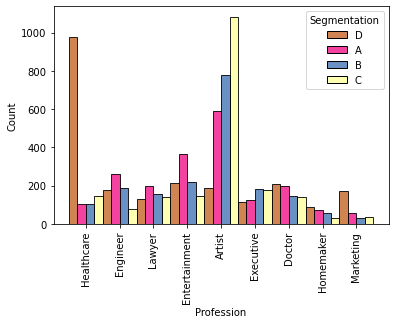

In [49]:
sns.set_palette('Accent_r', n_colors=6, desat=None, color_codes=False)

for ncolumns in ['Age','Work_Experience','Family_Size']:
    sns.boxplot(data=data, x="Segmentation", y= ncolumns)
    plt.show()


for ccolumns in ['Gender','Spending_Score', 'Ever_Married']:
    sns.histplot(data, x=ccolumns,hue = 'Segmentation', multiple="dodge")
    plt.show()

prof = sns.histplot(data, x='Profession',hue = 'Segmentation', multiple="dodge")
prof.tick_params(axis='x', rotation=90)

Looking at the segments heres what i noted about each group wrt to the given segments: 

A: 
Majority of the people in segment A are in between 35 and 55, have 0 to 4 years of experience in their careers. They also have a family size of 1-3 people on average and are almost equally male and female (more male). Most of them have a low spending average and have been married. The career that most people in the group have are in the healthcare industry. 

B:
Majority of the people in segment B are in between their late 30's till their late 50's, on average have 0 to 3 years of experience in their careers. They also have a family size of 2-4 people on average and are majority male . Their spending averages range  and between low and average (low being majority) and have been married. The career that most people in the group have are in the the arts. 

C:
Majority of the people in segment C are in between 40 and 60, on average have 0 to 2 years of experience in their careers. They also have a family size of 2-4 people on average and are almost equally male and female (more male) . Most of them have an average spending average and have been married. The career that most people in the group have are in the the arts. 


D:
Majority of the people in segment D are in between 20 and late 30's (however there are alot of outliers), and they have 0 to 5 years of experience in their careers. They also have a family size of 2-4 people on average and are majority male. Most of them have a low spending average and have never been married. The career that most people in the group have are in the healthcare industry. 


## Features! (correlation/encoding/standardizing)

before i start the modelling process it is important to make sure all my features are ready to be put through a model and since this is a classification problem and I will be using methods like SVM, naive bayes etc it is important to make sure my data is usable! 

since i will be using several different classification models to understand which model works the best for this company, i will perform feature scaling before using the KNN and SVM since they are distance based models. Scaling will not be required for my Random forest,decision tree and naive bayes model 


In [50]:
# the packages i need for this part 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [51]:
## encoding 
encod = LabelEncoder()

for col in data:
    if data[col].dtypes == 'object':
        data[col] = encod.fit_transform(data[col])
        
data.head() 

# done!! 


<ipython-input-51-f0485db23cc2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = encod.fit_transform(data[col])


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,3
1,0,1,38,1,2,1.0,0,3.0,3,0
2,0,1,67,1,2,1.0,2,1.0,5,1
3,1,1,67,1,7,0.0,1,2.0,5,1
4,0,1,40,1,3,1.0,1,6.0,5,0


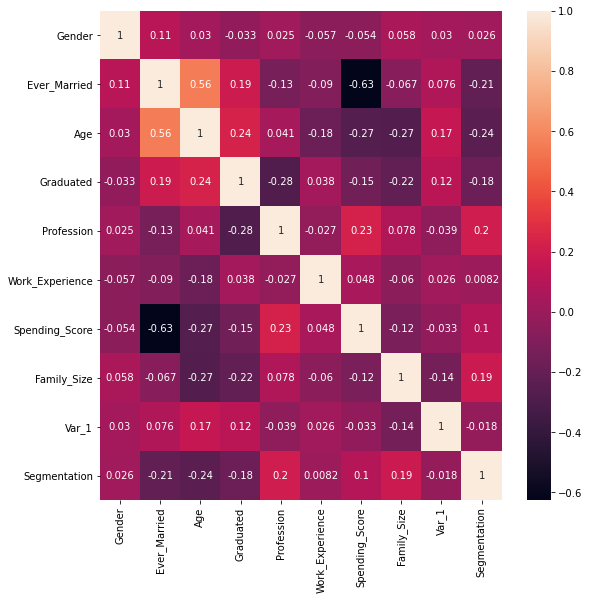

          feature       VIF
0    Ever_Married  4.799422
1  Spending_Score  3.019820
2             Age  8.556124


In [52]:
# correlation
# before modelling the data, lets check to see if there are any variables that are correlated to one another now that we have encoded our categorical variable 
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(), annot=True)
plt.show()

# there seems to be a moderate negative correlation between marital status and spending score as well as marital status and age.
# lets check out the correlaiton and make sure we can still use these variables 
# the independent variables set
X = data[['Ever_Married', 'Spending_Score', 'Age']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

# since there is no VIF that is higher than 10, there is no significant multicollinearity that needs to be corrected.

In [53]:
# splitting data to get it ready for modelling 
X = data.drop("Segmentation", axis = 1)
y = data["Segmentation"]

# standardize data before inputting in model 
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Divding dataset into a 20-80 testing training split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

## Modelling part 1 (Decision tree, random forest and Bernouli Naive)
in part 1 of my modelling I will be using my non distance based classification models. 


### Naive bayes 
We can use Naive Bayes classifier to assign each customer to a specific group based on their characteristics, such as their age, income, etc. The algorithm would calculate the probability that a customer belongs to each previous group, based on these characteristics. Naive Bayes assumes that each characteristic is independent of the others (even though this might not always be true), which is why it's called "naive". 

Accuracy Score is 0.4708798017348203
Classification Report               precision    recall  f1-score   support

           0       0.38      0.31      0.34       391
           1       0.34      0.15      0.21       369
           2       0.45      0.66      0.53       380
           3       0.58      0.71      0.64       474

    accuracy                           0.47      1614
   macro avg       0.44      0.46      0.43      1614
weighted avg       0.45      0.47      0.44      1614



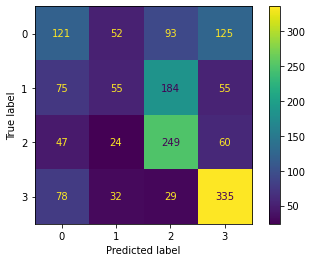

In [54]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, roc_auc_score, average_precision_score, classification_report


NBmodel = BernoulliNB()
NBmodel.fit(X_train,y_train)
NBmodel_pred=NBmodel.predict(X_test)

#confusion matrix
plot_confusion_matrix(NBmodel, X_test, y_test)

y_pred_prob = NBmodel.predict_proba(X_test)[:,1]

print("Accuracy Score is {}".format(accuracy_score(y_test, NBmodel_pred)))
print("Classification Report {}".format(classification_report(y_test, NBmodel_pred)))

### Decision tree 

A Decision Tree is a type of algorithm that can be used for classification tasks, like deciding which group (A, B, C, or D) a new customer should be assigned to. The algorithm works by asking a series of questions about the customer's characteristics (like their age, income, etc) and using the answers to guide it down different branches of the tree. At each step, the algorithm chooses the question that will best separate the customers into different groups. Eventually, the algorithm reaches a "leaf" node of the tree, which corresponds to one of the four groups. The Decision Tree algorithm can be a powerful tool for companies looking to segment their customers and make predictions about new customers based on their characteristics.

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best accuracy score: 0.5220027741249798
Accuracy Score is 0.5136307311028501
Classification Report               precision    recall  f1-score   support

           0       0.41      0.45      0.43       391
           1       0.40      0.27      0.32       369
           2       0.53      0.56      0.55       380
           3       0.63      0.72      0.67       474

    accuracy                           0.51      1614
   macro avg       0.49      0.50      0.49      1614
weighted avg       0.50      0.51      0.50      1614



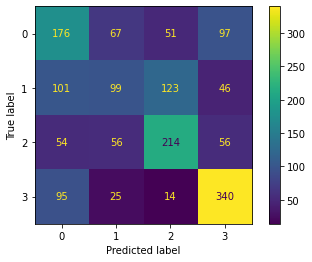

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=23) #easter egg causes its my bday date haha 
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 2, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [None, 'sqrt', 'log2']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

#perfect now that i have found my best hyperparameters 
DTmodel= DecisionTreeClassifier(random_state=23, criterion = 'entropy', max_depth= 5, max_features= None, min_samples_leaf= 4, min_samples_split= 2)
DTmodel.fit(X_train, y_train)

# Evaluate the performance of the decision tree classifier on the testing data
#confusion matrix
plot_confusion_matrix(DTmodel, X_test, y_test)
DTmodel_pred=DTmodel.predict(X_test)


print("Accuracy Score is {}".format(accuracy_score(y_test, DTmodel_pred)))
print("Classification Report {}".format(classification_report(y_test, DTmodel_pred)))

# slightly better than naive bayes, but not a huge difference. 

### Random Forest 
A Random Forest classifier is a machine learning model that is used to predict which group (A, B, C or D) a new customer should belong to based on their characteristics. It works by creating many decision trees and combining their predictions to make a final prediction. Each decision tree is built on a random subset of the data and a random subset of the features, which helps to reduce overfitting and improve the accuracy of the model. The Random Forest classifier is often used in situations where the data has many features or the relationships between the features are complex.

lets see if random forest is better than the decison tree model we used! 

Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy score: 0.5365654891647001
Accuracy Score is 0.5309789343246593
Classification Report               precision    recall  f1-score   support

           0       0.45      0.43      0.44       391
           1       0.44      0.37      0.40       369
           2       0.53      0.56      0.54       380
           3       0.65      0.72      0.68       474

    accuracy                           0.53      1614
   macro avg       0.52      0.52      0.52      1614
weighted avg       0.52      0.53      0.53      1614



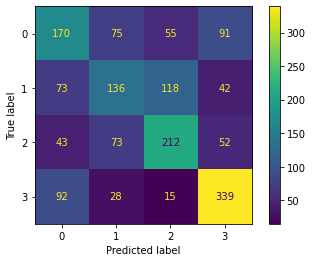

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier
rfc = RandomForestClassifier(random_state=0)

param_grid1 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}


# Initialize the grid search cross-validation object
grid_search1 =  GridSearchCV(rfc, param_grid=param_grid1, cv=5)
grid_search1.fit(X_train, y_train)

print("Best hyperparameters:", grid_search1.best_params_)
print("Best accuracy score:", grid_search1.best_score_)
    

#perfect now that i have found my best hyperparameters 
RFmodel= RandomForestClassifier(random_state=0, max_depth = 10, max_features = 'sqrt', min_samples_split = 2, n_estimators = 300)
RFmodel.fit(X_train, y_train)

# Evaluate the performance of the decision tree classifier on the testing data
#confusion matrix
plot_confusion_matrix(RFmodel, X_test, y_test)
RFmodel_pred=RFmodel.predict(X_test)


print("Accuracy Score is {}".format(accuracy_score(y_test, RFmodel_pred)))
print("Classification Report {}".format(classification_report(y_test, RFmodel_pred)))


## Modelling part 2 (KNN/SVM) 
in part 2 of my modelling I will be using my distance based classification models. I'll start of with KNN 


### KNN 
KNN, or k-Nearest Neighbors, is a machine learning algorithm that is used to classify new customers into one of the four segments A, B, C, or D, based on the characteristics of other customers in the dataset. The algorithm works by measuring the similarity between the characteristics of the new customer and the characteristics of the other customers, and then finding the k closest customers in the dataset. The new customer is then classified into the segment that is most common among the k closest customers. The value of k can be adjusted to increase or decrease the sensitivity of the model to outliers in the data

In [77]:
# lets check for the optimal amount of neighbours using the cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# define the range of values to test for n_neighbors
k_range = range(1, 31)

# define an empty list to store the mean accuracy for each value of n_neighbors
accuracy_scores = []

# iterate over the range of values for n_neighbors
for k in k_range:
    # create a KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    # compute the cross-validation score for the KNN classifier with k neighbors
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    # append the mean cross-validation score to the list of accuracy scores
    accuracy_scores.append(scores.mean())

# find the value of k with the highest mean accuracy score
optimal_k = k_range[np.argmax(accuracy_scores)]

print("The optimal number of clusters for KNN is:", optimal_k)


The optimal number of clusters for KNN is: 30


Accuracy Score is 0.5043370508054523
Classification Report               precision    recall  f1-score   support

           0       0.41      0.41      0.41       391
           1       0.40      0.34      0.37       369
           2       0.50      0.54      0.52       380
           3       0.65      0.68      0.66       474

    accuracy                           0.50      1614
   macro avg       0.49      0.49      0.49      1614
weighted avg       0.50      0.50      0.50      1614



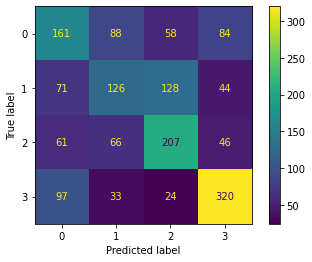

In [84]:
#although it said 30, 20 seemed to give a better accuracy score, so lets go with that

KNNmodel = KNeighborsClassifier(n_neighbors=20)
KNNmodel.fit(X_train, y_train)

# Evaluate the performance of the decision tree classifier on the testing data
#confusion matrix
plot_confusion_matrix(KNNmodel, X_test, y_test)
KNNmodel_pred=KNNmodel.predict(X_test)


print("Accuracy Score is {}".format(accuracy_score(y_test, KNNmodel_pred)))
print("Classification Report {}".format(classification_report(y_test, KNNmodel_pred)))


### SVM

SVM, or Support Vector Machine, is a machine learning algorithm that is used to classify new customers into one of the four segments A, B, C, or D, based on their characteristics. The algorithm works by finding the best boundary, called a hyperplane, that separates the different segments in the data with the maximum margin. The algorithm then predicts the segment of the new customer based on which side of the hyperplane they fall on. SVM is useful in situations where the data has complex relationships between the features and where there is not a clear linear boundary between the different segments.

Accuracy Score is 0.5254027261462205
Classification Report               precision    recall  f1-score   support

           0       0.43      0.47      0.45       391
           1       0.44      0.33      0.38       369
           2       0.51      0.55      0.53       380
           3       0.66      0.70      0.68       474

    accuracy                           0.53      1614
   macro avg       0.51      0.51      0.51      1614
weighted avg       0.52      0.53      0.52      1614



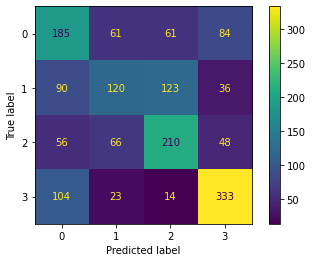

In [85]:
from sklearn.svm import SVC
SVMmodel = SVC()

# Train the SVM classifier on the training data
SVMmodel.fit(X_train, y_train)

# Evaluate the performance of the decision tree classifier on the testing data
#confusion matrix
plot_confusion_matrix(SVMmodel, X_test, y_test)
SVMmodel_pred=SVMmodel.predict(X_test)


print("Accuracy Score is {}".format(accuracy_score(y_test, SVMmodel_pred)))
print("Classification Report {}".format(classification_report(y_test, SVMmodel_pred)))

# TESTING

In [89]:
dat1 = pd.read_csv("Test.csv")
test = dat1.loc[:, dat.columns != 'ID']

In [92]:
## pre-processing test data

# Check for Data Types
test.info()
## all good, there seems to be nothing out of place or encoded as the wrong thing
## Check for Missing Values
test.isnull().sum()

for col in test.columns:
    test[col].fillna(test[col].mode()[0], inplace=True)

test.isnull().sum()
    
# Check for Bad Data 
test[test == 0].count() 
# makes sense 

## encoding 
encod = LabelEncoder()

for col in test:
    if test[col].dtypes == 'object':
        test[col] = encod.fit_transform(test[col])
        
test.head() 

#scaling



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2627 non-null   object 
 1   Ever_Married     2627 non-null   object 
 2   Age              2627 non-null   int64  
 3   Graduated        2627 non-null   object 
 4   Profession       2627 non-null   object 
 5   Work_Experience  2627 non-null   float64
 6   Spending_Score   2627 non-null   object 
 7   Family_Size      2627 non-null   float64
 8   Var_1            2627 non-null   object 
 9   Segmentation     2627 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 205.4+ KB


C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-92-9790f5762eb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = encod.fit_transform(test[col])


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,1,36,1,2,0.0,2,1.0,5,1
1,1,1,37,1,5,8.0,0,4.0,5,0
2,0,1,69,0,0,0.0,2,1.0,5,0
3,1,1,59,0,4,11.0,1,2.0,5,1
4,0,0,19,0,8,1.0,2,4.0,5,0


In [94]:
Xtest = test.drop("Segmentation", axis = 1)
ytest = test["Segmentation"]

# standardize data before inputting in model 
scaler=StandardScaler()
XX=scaler.fit_transform(Xtest)

X_train, X_test, y_train, y_test=train_test_split(XX,ytest,test_size=0.2, random_state=42)

Best hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy score: 0.35506730007917653
Accuracy Score is 0.3403041825095057
Classification Report               precision    recall  f1-score   support

           0       0.33      0.68      0.45       177
           1       0.05      0.01      0.02        97
           2       0.00      0.00      0.00       116
           3       0.40      0.43      0.41       136

    accuracy                           0.34       526
   macro avg       0.20      0.28      0.22       526
weighted avg       0.22      0.34      0.26       526



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


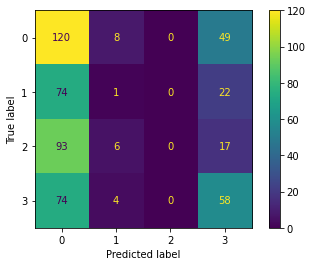

In [105]:
# Initialize the random forest classifier
rfc = RandomForestClassifier(random_state=0)

param_grid1 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}


# Initialize the grid search cross-validation object
grid_search1 =  GridSearchCV(rfc, param_grid=param_grid1, cv=5)
grid_search1.fit(X_train, y_train)

print("Best hyperparameters:", grid_search1.best_params_)
print("Best accuracy score:", grid_search1.best_score_)

# found new hyperparameters 

RFmodel= RandomForestClassifier( max_depth = 5, max_features = 'sqrt', min_samples_split = 2, n_estimators = 100)
RFmodel.fit(X_train, y_train)

# Evaluate the performance of the decision tree classifier on the testing data
#confusion matrix
plot_confusion_matrix(RFmodel, X_test, y_test)
RFmodel_pred=RFmodel.predict(X_test)


print("Accuracy Score is {}".format(accuracy_score(y_test, RFmodel_pred)))
print("Classification Report {}".format(classification_report(y_test, RFmodel_pred)))

Accuracy Score is 0.33460076045627374
Classification Report               precision    recall  f1-score   support

           0       0.35      0.66      0.45       177
           1       0.15      0.08      0.11        97
           2       0.00      0.00      0.00       116
           3       0.38      0.38      0.38       136

    accuracy                           0.33       526
   macro avg       0.22      0.28      0.24       526
weighted avg       0.24      0.33      0.27       526



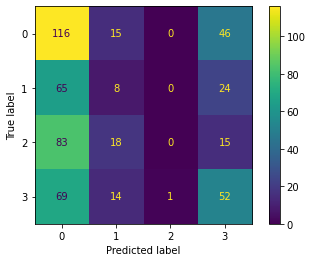

In [114]:
SVMmodel.fit(X_train, y_train)

# Evaluate the performance of the decision tree classifier on the testing data
#confusion matrix
plot_confusion_matrix(SVMmodel, X_test, y_test)
SVMmodel_pred=SVMmodel.predict(X_test)


print("Accuracy Score is {}".format(accuracy_score(y_test, SVMmodel_pred)))
print("Classification Report {}".format(classification_report(y_test, SVMmodel_pred)))

In [120]:
## FINALLY!! using this method we could just put in the attributes and figure out the segment they would be in 


new_data = [[0, 1, 50, 1, 2, 0.0, 2, 1.0, 3]]  # A new data point with four features
prediction = RFmodel.predict(Xtest)
print("Prediction:", prediction)


Prediction: [0 0 0 ... 0 0 0]
